### gridsearch to find best hyperparameters for Support Vector Machine

In [1]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

#### Number of random trials

In [2]:
NUM_TRIALS = 30

#### Load the iris dataset

In [3]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

#### Set up possible values of parameters to optimize over

In [4]:
p_grid = {"C": [1, 10, 100], "gamma": [.01, .1]}

In [151]:
def gridSearch(svm, trials, X, y):
    scores = np.zeros(trials)
    for i in range(trials):
        cv = KFold(n_splits=4, shuffle=True, random_state=i)
        clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=cv)
        clf.fit(X, y)
        scores[i] = clf.best_score_
    return scores

In [152]:
def crossValidateScores(svm, trials, X, y):
    scores = np.zeros(trials)
    for i in range(trials):
        cv = KFold(n_splits=4, shuffle=True, random_state=i)
        score = cross_val_score(clf, X=X_iris, y=y_iris, cv=cv)
        scores[i] = score.mean()
    return scores;    

In [156]:
def plotScoresPerTrail(scores_a, scores_b):
    plt.figure()
    plt.subplot(211)
    non_nested_scores_line, = plt.plot(scores_a, color='r')
    nested_line, = plt.plot(scores_b, color='b')
    plt.ylabel("score", fontsize="11")
    plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
    plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="11")
    plt.show()

### Validate different Support Vector Kernels

linear - gridSearch best scores: 0.9773411569464199
linear - cross validation mean scores: 0.9649359886201989
Average difference of 0.012405 with std. dev. of 0.010398.


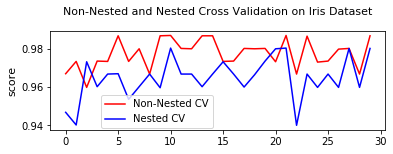

poly - gridSearch best scores: 0.972036510194405
poly - cross validation mean scores: 0.9649359886201989
Average difference of 0.007101 with std. dev. of 0.009071.


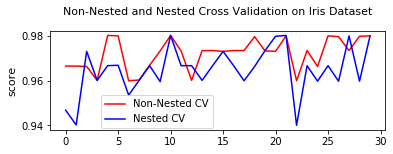

rbf - gridSearch best scores: 0.9736190137505927
rbf - cross validation mean scores: 0.9649359886201989
Average difference of 0.008683 with std. dev. of 0.006680.


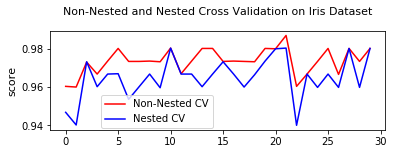

In [157]:
for kernel in ('linear', 'poly', 'rbf'):
    svm = SVC(kernel=kernel)
    best_scores = gridSearch(svm, NUM_TRIALS, X_iris, y_iris)
    print(str(kernel) + ' - gridSearch best scores: ' +  str(best_scores.mean()))
    cross_validate_scores = crossValidateScores(svm, NUM_TRIALS, X_iris, y_iris)
    print(str(kernel) + ' - cross validation mean scores: ' +  str(cross_validate_scores.mean()))
    score_diff = best_scores -  cross_validate_scores
    print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_diff.mean(), score_diff.std()))
    plotScoresPerTrail(best_scores, cross_validate_scores)

#### Arrays to store scores

In [6]:
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

#### Loop for each trial

In [7]:
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    
     # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

In [8]:
score_difference = non_nested_scores - nested_scores

print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

Average difference of 0.007581 with std. dev. of 0.007833.


Text(0.5, 1.1, 'Non-Nested and Nested Cross Validation on Iris Dataset')

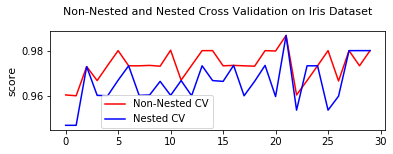

In [133]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="11")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="11")

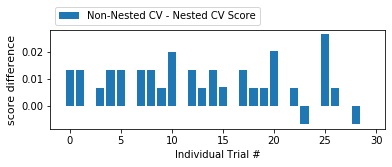

In [135]:
# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="11")

plt.show()